<center><h1>Create a TensorFlow 2 Image Classifier</h1></center>

In [24]:
pip install tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset (replace with your dataset if needed)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5


2025-02-02 16:57:41.322496: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1866/1875 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.9255

2025-02-02 16:57:49.831943: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.2637 - accuracy: 0.9257 - val_loss: 0.1361 - val_accuracy: 0.9591
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1155 - accuracy: 0.9657 - val_loss: 0.1030 - val_accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0794 - accuracy: 0.9763 - val_loss: 0.0860 - val_accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0796 - val_accuracy: 0.9743
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0460 - accuracy: 0.9851 - val_loss: 0.0733 - val_accuracy: 0.9772


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Save the model
model.save("simple_tf_classifier.h5")

2025-02-02 16:58:22.893396: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9772

Test Accuracy: 0.9772


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
sample_image = np.expand_dims(x_test[0], axis=0)  # Pick first test image
predictions = model.predict(sample_image)

1/1 [==============================] - 0s 130ms/step


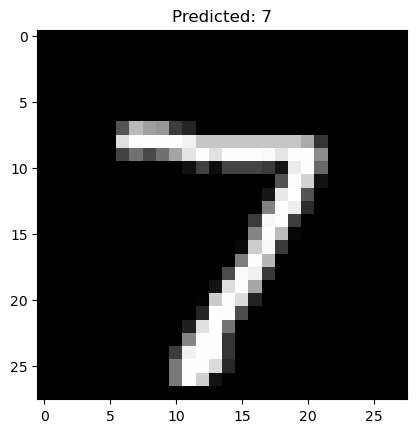

In [31]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions)}")
plt.show()